In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import sympy as sym
from sympy import init_session
from sympy import init_printing


In [2]:
init_session()

IPython console for SymPy 1.10.1 (Python 3.9.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



## Punto 1

## Punto 6

## Punto 7

In [3]:
data = pd.read_csv('Sigmoid.csv')

In [4]:
def fit_model(x, a, b, c):
    return a / (b + np.exp(-c * x))

def sym_fit(x, a, b, c):
    return a / (b + sym.exp(-c * x))

def cost_function(x, y, a, b, c):
    return np.sum((y - fit_model(x, a, b, c))**2)
def symbolic_cost_function(x, y, a, b, c):
    return sym.Sum((y - sym_fit(x, a, b, c))**2, (x, 0, len(data['x'])))

def partial_symbolic_derivative():
    x = sym.symbols('x')
    y = sym.symbols('y')
    a = sym.symbols('theta_0')
    b = sym.symbols('theta_1')
    c = sym.symbols('theta_2')
    sym_cost = symbolic_cost_function(x, y, a, b, c)
    return sym.diff(sym_cost, a), sym.diff(sym_cost, b), sym.diff(sym_cost, c)

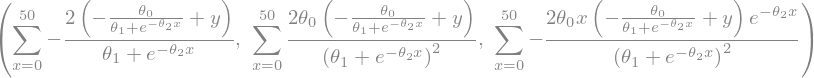

In [5]:
init_printing(use_latex=True)

partial_symbolic_derivative()


<img src="https://i.lensdump.com/i/1htIk1.jpg" alt="1htIk1.jpg" border="0" />

In [6]:
def partial_derivative(x, y, a, b, c):
    partial_a = 0
    partial_b = 0
    partial_c = 0
    for i in range(len(x)):
        partial_a += 2 * (a / (b + np.exp(-c * x[i])) - y[i]) / (b + np.exp(-c * x[i]))
        partial_b += 2 * (a / (b + np.exp(-c * x[i])) - y[i]) * a * np.exp(-c * x[i]) / (b + np.exp(-c * x[i]))**2
        partial_c += 2 * (a / (b + np.exp(-c * x[i])) - y[i]) * a * x[i] * np.exp(-c * x[i]) / (b + np.exp(-c * x[i]))**2
    return partial_a, partial_b, partial_c

def gradient_descent(x, y, a, b, c, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        a = a - learning_rate * partial_derivative(x, y, a, b, c)[0]
        b = b - learning_rate * partial_derivative(x, y, a, b, c)[1]
        c = c - learning_rate * partial_derivative(x, y, a, b, c)[2]
        cost_history[i] = cost_function(x, y, a, b, c)
    return a, b, c, cost_history

In [7]:
model = gradient_descent(data['x'], data['y'], 1, 1, 1, 0.0001, 10000)


(4.517779201141752,
 0.9975196558191154,
 2.358597394835304,
 array([2.01715721e+02, 2.00577415e+02, 1.99448146e+02, ...,
        1.80673930e-01, 1.80658454e-01, 1.80642981e-01]))

## Punto 8